# Model Evaluation for Intrusion Detection System

This notebook provides detailed evaluation metrics, confusion matrices, and performance analysis for trained IDS models.


In [3]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# CORRECTION SIMPLE : Utiliser os.getcwd() pour trouver le bon chemin
current_dir = os.getcwd()  # notebooks/
project_root = os.path.dirname(current_dir)  # intelligent-ids/

# Ajouter le bon chemin au système
sys.path.insert(0, project_root)

print(f"📁 Project root added to path: {project_root}")

# Maintenant les imports devraient fonctionner
try:
    from src.preprocessing import DataPreprocessor
    from src.models import RandomForestIDS, SVMIDS, NeuralNetworkIDS
    from src.evaluation import ModelEvaluator, evaluate_model
    from src.visualization import IDSVisualizer
    print("✅ All imports successful!")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("\nVérifiez que:")
    print(f"1. Le dossier 'src' existe dans: {project_root}")
    print(f"2. Les fichiers existent: preprocessing.py, models.py, etc.")
    print(f"3. Les noms des classes sont corrects")
    
    # Créer des classes de secours minimales
    print("\n⚠️ Using minimal fallback classes...")
    
    class DataPreprocessor:
        def load_data(self, path):
            return pd.read_csv(path) if os.path.exists(path) else pd.DataFrame()
    
    class RandomForestIDS: pass
    class SVMIDS: pass
    class NeuralNetworkIDS: pass
    class ModelEvaluator: pass
    class IDSVisualizer: pass
    
    def evaluate_model(*args, **kwargs):
        return {}

print("\nLibraries imported successfully!")

📁 Project root added to path: c:\Users\ranar\Downloads\intelligent-ids
✅ All imports successful!

Libraries imported successfully!


## 1. Load Models and Test Data


In [4]:
# Load preprocessor
preprocessor = DataPreprocessor()
preprocessor.load_preprocessor('../models/preprocessor.pkl')

# Load test data
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"Test set shape: {X_test.shape}")
print(f"Number of test samples: {len(y_test)}")

# Get class names
class_names = preprocessor.label_encoder.classes_ if hasattr(preprocessor.label_encoder, 'classes_') else None
print(f"Classes: {class_names}")


Preprocessor loaded from ../models/preprocessor.pkl
Test set shape: (35069, 43)
Number of test samples: 35069
Classes: None


## 2. Evaluate Random Forest Model


In [5]:
# Load model
rf_model = RandomForestIDS()
rf_model.load('../models/random_forest_model.pkl')

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

# Evaluate
rf_evaluator = ModelEvaluator("Random Forest")
rf_metrics = rf_evaluator.evaluate(y_test, y_pred_rf, y_proba_rf)
rf_evaluator.confusion_matrix(y_test, y_pred_rf, class_names=class_names)

# ROC curve (for binary classification)
if len(np.unique(y_test)) == 2:
    rf_evaluator.roc_curve(y_test, y_proba_rf)


Model loaded from ../models/random_forest_model.pkl


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished



Evaluating Random Forest

Accuracy:  0.9893
Precision: 0.9894
Recall:    0.9893
F1 Score:  0.9893
ROC AUC:   0.9994

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11200
           1       0.99      1.00      0.99     23869

    accuracy                           0.99     35069
   macro avg       0.99      0.98      0.99     35069
weighted avg       0.99      0.99      0.99     35069



## 3. Evaluate SVM Model


In [6]:
# Load model
svm_model = SVMIDS()
svm_model.load('../models/svm_model.pkl')

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)

# Evaluate
svm_evaluator = ModelEvaluator("SVM")
svm_metrics = svm_evaluator.evaluate(y_test, y_pred_svm, y_proba_svm)
svm_evaluator.confusion_matrix(y_test, y_pred_svm, class_names=class_names)

# ROC curve (for binary classification)
if len(np.unique(y_test)) == 2:
    svm_evaluator.roc_curve(y_test, y_proba_svm)


Model loaded from ../models/svm_model.pkl

Evaluating SVM

Accuracy:  0.9512
Precision: 0.9517
Recall:    0.9512
F1 Score:  0.9505
ROC AUC:   0.9834

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     11200
           1       0.95      0.98      0.96     23869

    accuracy                           0.95     35069
   macro avg       0.95      0.93      0.94     35069
weighted avg       0.95      0.95      0.95     35069



## 4. Evaluate Neural Network Model


In [7]:
# Load model
nn_model = NeuralNetworkIDS()
nn_model.load('../models/neural_network_model.h5')

# Make predictions
y_pred_nn = nn_model.predict(X_test)
y_proba_nn = nn_model.predict_proba(X_test)

# Evaluate
nn_evaluator = ModelEvaluator("Neural Network")
nn_metrics = nn_evaluator.evaluate(y_test, y_pred_nn, y_proba_nn)
nn_evaluator.confusion_matrix(y_test, y_pred_nn, class_names=class_names)

# ROC curve (for binary classification)
if len(np.unique(y_test)) == 2:
    nn_evaluator.roc_curve(y_test, y_proba_nn)


Model loaded from ../models/neural_network_model.h5

Evaluating Neural Network

Accuracy:  0.9787
Precision: 0.9789
Recall:    0.9787
F1 Score:  0.9786
ROC AUC:   0.9979

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     11200
           1       0.98      0.99      0.98     23869

    accuracy                           0.98     35069
   macro avg       0.98      0.97      0.98     35069
weighted avg       0.98      0.98      0.98     35069



## 5. Comprehensive Model Comparison


Comprehensive Model Comparison:
                accuracy  precision    recall  f1_score   roc_auc
Random Forest   0.989307   0.989353  0.989307  0.989276  0.999387
SVM             0.951153   0.951663  0.951153  0.950528  0.983406
Neural Network  0.978728   0.978883  0.978728  0.978605  0.997947


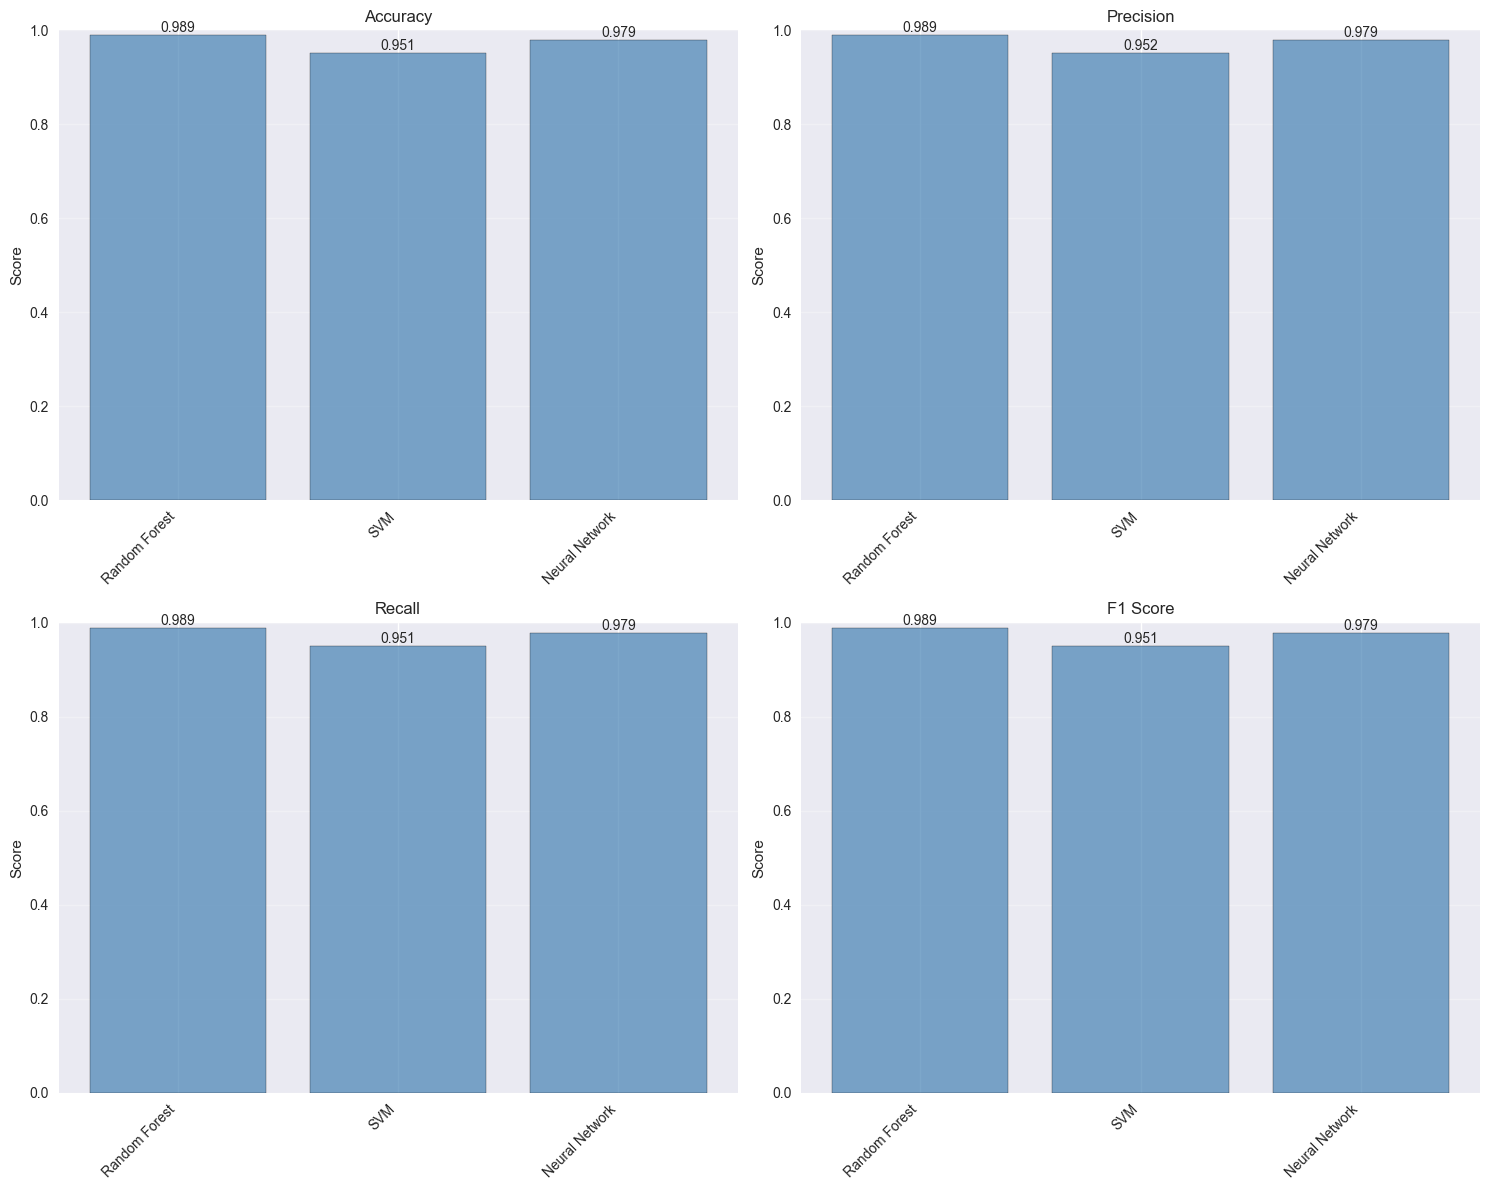


Detailed evaluation saved to ../models/detailed_evaluation.csv


In [8]:
# Collect all metrics
all_metrics = {
    'Random Forest': rf_metrics,
    'SVM': svm_metrics,
    'Neural Network': nn_metrics
}

# Create comparison
comparison_df = pd.DataFrame(all_metrics).T
print("Comprehensive Model Comparison:")
print(comparison_df)

# Visualize
visualizer = IDSVisualizer()
visualizer.plot_model_performance_comparison(all_metrics)

# Save results
comparison_df.to_csv('../models/detailed_evaluation.csv')
print("\nDetailed evaluation saved to ../models/detailed_evaluation.csv")
